In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import numpy as np
import cv2
import copy
import math
from numpy import cos, sin, pi, exp
from math import fabs, sqrt
import time
import random

In [2]:
import OpCV_Utils

In [3]:
def Rot(thetaRX, thetaRY, thetaRZ):

    thetaRX = np.radians(thetaRX)
    thetaRY = np.radians(thetaRY)
    thetaRZ = np.radians(thetaRZ)

    RX = np.array([[1, 0, 0],
          [0, np.cos(thetaRX), np.sin(thetaRX)],
          [0, -np.sin(thetaRX), np.cos(thetaRX)]])

    RY = np.array([[np.cos(thetaRY), 0, -np.sin(thetaRY)],
          [0, 1, 0],
          [np.sin(thetaRY), 0, np.cos(thetaRY)]])

    RZ = np.array([[np.cos(thetaRZ), np.sin(thetaRZ), 0],
          [-np.sin(thetaRZ), np.cos(thetaRZ), 0],
          [0, 0, 1]])

    # Transposition in order to keep the rotations related to the reference:
    RX = np.transpose(RX)
    RY = np.transpose(RY)
    RZ = np.transpose(RZ)

    R = np.matmul(RZ, RY)
    R = np.matmul(R, RX)

    return R

In [4]:
def vec_to_quiver(origin, vector):
    
    # This function will prepare a (X,Y,Z) array vector coordinates to quiver format (X,Y,Z,U,V,W)
    # considering the determined origin coordinates.
    
    vector_q = np.array([origin[0], origin[1], origin[2], vector[0], vector[1], vector[2]])
    
    return vector_q


In [5]:
def config_ax(ax):
    
    Xmin, Xmax = 0, 400
    Ymin, Ymax = 0, 400
    Zmin, Zmax = 0, 200

    # Axis Properties ======================================================================================
    # These needed to be inside the loop because the figure is cleanned every iteration

    ax.set_xlabel('\n X ', fontsize=15)
    ax.set_ylabel('\n Y ', fontsize=15)
    ax.set_zlabel('\n Z ', fontsize=15)

    ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    ax.set_zticks([0, 50, 100, 150, 200])
    ax.dist = 12

    ax.set_xlim([Xmin, Xmax])
    ax.set_ylim([Ymin, Ymax])
    ax.set_zlim([Zmin, Zmax])
    
    ax.set_title('Optics Simulation', fontsize=15)

    ax.quiver(Xmin, 0, 0, Xmax, 0, 0, arrow_length_ratio = 0.05, color='k')
    ax.quiver(0, Ymin, 0, 0, Ymax, 0, arrow_length_ratio = 0.05, color='k')
    ax.quiver(0, 0, Zmin, 0, 0, Zmax, arrow_length_ratio = 0.05, color='k')


In [6]:
def place_object(ax, pos, height, width, rotations, obj_name, color='k'):
        
    up     = np.array([0, 0, height/2])
    down   = np.array([0, 0, -height/2])
    right  = np.array([0, width/2, 0])
    left   = np.array([0, -width/2, 0])
    
    RX, RY, RZ = rotations
    
    origin_1 = pos + Rot(RX, RY, RZ).dot(np.array([0, 0, height/2]))
    origin_2 = pos + Rot(RX, RY, RZ).dot(np.array([0, width/2, 0]))
    origin_3 = pos + Rot(RX, RY, RZ).dot(np.array([0, 0, -height/2]))
    origin_4 = pos + Rot(RX, RY, RZ).dot(np.array([0, -width/2, 0]))
    
    up[0], up[1], up[2]          = Rot(RX, RY, RZ).dot(np.array([up[0], up[1], up[2]]))
    down[0], down[1], down[2]    = Rot(RX, RY, RZ).dot(np.array([down[0], down[1], down[2]]))
    right[0], right[1], right[2] = Rot(RX, RY, RZ).dot(np.array([right[0], right[1], right[2]]))
    left[0], left[1], left[2]    = Rot(RX, RY, RZ).dot(np.array([left[0], left[1], left[2]]))

    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_4, up)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_4, down)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_1, right)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_1, left)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_2, up)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_2, down)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_3, right)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(origin_3, left)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color=color)
    
    ax.text(pos[0], pos[1], pos[2], obj_name, (0,0,0))


In [7]:
def place_camera(ax, pos, f, s_height, s_width, rotations, w_dis):
    
    RX, RY, RZ = rotations
    
    s_pos = Rot(RX, RY, RZ).dot(np.array([-f, 0, 0]))
    s_pos = s_pos[0]+pos[0], s_pos[1]+pos[1], s_pos[2]+pos[2]
    
    place_object(ax, pos, s_height*3, s_width*3, rotations, 'Lens', 'b') # Lens
    place_object(ax, s_pos, s_height, s_width, rotations, 'Sensor', 'r') # Sensor
    
    H = w_dis*(s_height)/f
    W = w_dis*(s_width)/f

    work_pos = Rot(RX, RY, RZ).dot(np.array([w_dis, 0, 0]))
    work_pos = work_pos[0]+pos[0], work_pos[1]+pos[1], work_pos[2]+pos[2]
    place_object(ax, work_pos, H, W, rotations, 'Work Area', 'r')
    
    # draw pyramid:
    
    s_p1 = pos + Rot(RX, RY, RZ).dot(np.array([-f, -s_width/2, s_height/2]))
    s_p2 = pos + Rot(RX, RY, RZ).dot(np.array([-f, s_width/2, s_height/2]))
    s_p3 = pos + Rot(RX, RY, RZ).dot(np.array([-f, -s_width/2, -s_height/2]))
    s_p4 = pos + Rot(RX, RY, RZ).dot(np.array([-f, s_width/2, -s_height/2]))
    
    w_p1 = pos + Rot(RX, RY, RZ).dot(np.array([w_dis, -W/2, H/2]))
    w_p2 = pos + Rot(RX, RY, RZ).dot(np.array([w_dis, W/2, H/2]))
    w_p3 = pos + Rot(RX, RY, RZ).dot(np.array([w_dis, -W/2, -H/2]))
    w_p4 = pos + Rot(RX, RY, RZ).dot(np.array([w_dis, W/2, -H/2]))
    
    vec_1 = w_p4 - s_p1
    vec_2 = w_p3 - s_p2
    vec_3 = w_p1 - s_p4
    vec_4 = w_p2 - s_p3
    
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(s_p1, vec_1)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color='r')
    
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(s_p2, vec_2)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color='r')
    
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(s_p4, vec_3)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color='r')
    
    x_lens, y_lens, z_lens, u_lens, v_lens, w_lens = vec_to_quiver(s_p3, vec_4)
    ax.quiver(x_lens, y_lens, z_lens, u_lens, v_lens, w_lens, arrow_length_ratio = 0.1, color='r')
    

In [8]:
############################################################################
#trackbar callback function does nothing but required for trackbar
def nothing(x):
    pass

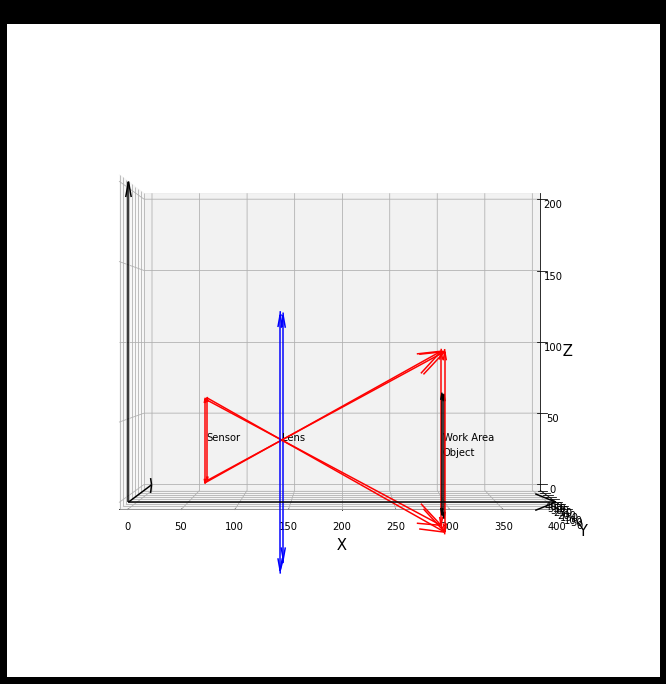

In [36]:
# Graph Properties:
fig = plt.figure(figsize=(12,12), facecolor='k')
ax = fig.add_subplot(111, projection='3d')

x, y, z = (200, 200, 50)
rx = 0
ry = 0
rz = 0
    
sensor_height = 20
sensor_width  = 20
focal_length = 20
w_dis = 150

while True:
    
    ax.view_init(20, -60)
        
    config_ax(ax)
    clear_output(wait=False)     
    camera_pos = (x, y, z)
    rotations  = (rx, ry, rz)
                        
    place_camera(ax, camera_pos, focal_length, sensor_height, sensor_width, rotations, w_dis)
    place_object(ax, (300, 200, 25), 80, 80, (0,0,0), 'Object', 'k')
   
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    
    cv2.putText(img, 'Optics Simulation Prototype', (300, 135), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
    cv2.putText(img, f'Focal Length: {focal_length}', (150, 135), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Work Distance: {w_dis}', (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Sensor Area: {sensor_width}x{sensor_height}', (150, 165), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    
    cv2.putText(img, f'Pos X {x}', (150, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Pos Y {y}', (150, 195), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Pos Z {z}', (150, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    
    cv2.putText(img, f'Angle RX {rx}', (150, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Angle RY {ry}', (150, 240), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    cv2.putText(img, f'Angle RZ {rz}', (150, 255), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1)
    
    img = img[100:745,110:775,:]
    
    ax.view_init(0, -90)
    fig.canvas.draw()
    img_side = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_side = img_side.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img_side = cv2.cvtColor(img_side,cv2.COLOR_RGB2BGR)
    img_side = img_side[100:745,110:775,:]
    cv2.putText(img_side, 'Side View', (300, 135), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
    
    img_to_show = OpCV_Utils.stackImgs([[img, img_side]], sep_lines=True, scale=1.0)

    cv2.imshow("Optics Simulation Controls", img_to_show)
    
    key = cv2.waitKey(1) or 0xff   
    if key == ord('q'):
        break
    
    # Keyboard Controller
    if key == ord('d'):
        x = x+5
    if key == ord('a'):
        x = x-5
    if key == ord('w'):
        y = y+5
    if key == ord('s'):
        y = y-5
    if key == ord('t'):
        z = z+5
    if key == ord('g'):
        z = z-5
        
    if key == ord('l'):
        rx = rx+5
    if key == ord('j'):
        rx = rx-5
    if key == ord('i'):
        ry = ry+5
    if key == ord('k'):
        ry = ry-5
    if key == ord('['):
        rz = rz+5
    if key == ord(']'):
        rz = rz-5
        
    if key == ord('1'):
        sensor_height = sensor_height+5
    if key == ord('2'):
        sensor_height = sensor_height-5
    
    if key == ord('3'):
        sensor_width = sensor_width+5
    if key == ord('4'):
        sensor_width = sensor_width-5
        
    if key == ord('5'):
        focal_length = focal_length+5
    if key == ord('6'):
        focal_length = focal_length-5
        
    if key == ord('7'):
        w_dis = w_dis+5
    if key == ord('8'):
        w_dis = w_dis-5
        
    if key == ord('m'):
        focal_length  = 20
        sensor_height = 20
        sensor_width  = 20
        w_dis = 150
        x, y, z = (200,200,50)
        rx, ry, rz = (0,0,0)
    
    ax.cla()
    
cv2.destroyAllWindows()